At the end of this notebook, we will have submitted to the ["Paddy Doctor: Paddy Disease Classification" competition on Kaggle](https://www.kaggle.com/competitions/paddy-disease-classification/overview)!

Let us begin by downloading the data.

In [5]:
#%%bash

# exec zbash
!rm -rf data
!mkdir data
!apt install unzip


The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.



In [6]:
pip install -U timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.5/431.5 kB 7.2 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
!cd data && kaggle competitions download -c paddy-disease-classification && unzip -q paddy-disease-classification.zip

100%|█████████████████████████████████████▉| 1.02G/1.02G [00:24<00:00, 34.5MB/s]
100%|██████████████████████████████████████| 1.02G/1.02G [00:25<00:00, 43.7MB/s]


In [1]:
import timm

We have now downloaded and extracted the data to the `data` directory.

In [2]:
ls data

paddy-disease-classification.zip  train.csv
sample_submission.csv             train_images/
test_images/


In [3]:
ls data/train_images

bacterial_leaf_blight/    brown_spot/               normal/
bacterial_leaf_streak/    dead_heart/               tungro/
bacterial_panicle_blight/ downy_mildew/
blast/                    hispa/


In [4]:
ls data/test_images | head

200001.jpg
200002.jpg
200003.jpg
200004.jpg
200005.jpg
200006.jpg
200007.jpg
200008.jpg
200009.jpg
200010.jpg


Seems that the train data is organized by directories, with the name of the directory being the label.

Test images just live in `data/test_images`

Let us see what is the format of the sample submission file to have a full picture.

In [5]:
import pandas as pd

sample_sub = pd.read_csv('data/sample_submission.csv')
sample_sub.head()

,image_id,label
0,200001.jpg,NaN
1,200002.jpg,NaN
2,200003.jpg,NaN
3,200004.jpg,NaN
4,200005.jpg,NaN


Mhmm. Guessing the labels for the submission are the names of the directories.

Ok, let's start training!

In [6]:
pip install IProgress

Note: you may need to restart the kernel to use updated packages.


In [7]:
from fastai.vision.all import *

I am going through the `01_intro.ipynb` notebook and it seems the files in the example there are organizedin a different way than the files here 🤔

Well, but I have the handy `doc` function! I bet it can give me a suggestion on how to approach this!

I see that this `ImageDataLoaders` is used... I run `doc` on it and click `Show in docs` to read a bit more about this in my browser.

In [20]:
doc(ImageDataLoaders)

Well, the `from_path_re` class method seems interesting. Maybe I can get it to work.

In [9]:
fns = get_image_files('data/train_images/')
fns # looks about right!

(#10407) [Path('data/train_images/dead_heart/110369.jpg'),Path('data/train_images/dead_heart/105002.jpg'),Path('data/train_images/dead_heart/106279.jpg'),Path('data/train_images/dead_heart/108254.jpg'),Path('data/train_images/dead_heart/104308.jpg'),Path('data/train_images/dead_heart/107629.jpg'),Path('data/train_images/dead_heart/110355.jpg'),Path('data/train_images/dead_heart/100146.jpg'),Path('data/train_images/dead_heart/103329.jpg'),Path('data/train_images/dead_heart/105980.jpg')...]

Now let me experiment with just a single path and a regex pattern.

In [10]:
import re

In [11]:
str(fns[0])

'data/train_images/dead_heart/110369.jpg'

In [12]:
pat = r'/([^/]*)/\d+.jpg$'
re.search(pat, str(fns[0])).group(1)

'dead_heart'

Well, this seems to work. Only way to find out is to try!

And don't worry about the regex. I copied it from the docs 😄 I don't mind writing regexes, expecially with useful [tools around](https://pythex.org/) but I always, ALWAYS have to google the API. Is it `search` or `match`? How do the groups work? Oh dear...

Anyhow

In [23]:
dls = ImageDataLoaders.from_path_re('data', fns, pat, item_tfms=Resize(224, method=ResizeMethod.Pad), bs=64, val_bs=64)

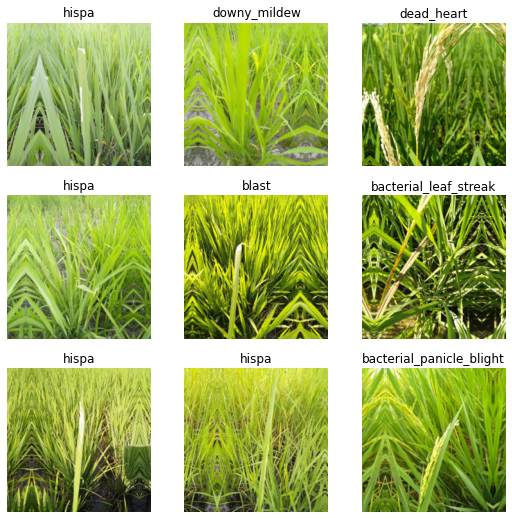

In [24]:
dls.train.show_batch()

Looks like it worked! 🥳

In [25]:
len(dls.train), len(dls.valid)

(130, 33)

In [26]:
dls.bs

64

In [27]:
dls.valid.bs

64

I am just clicking around, learning about the objects I got returned! Marvelous!

Let's train.

In [17]:
import timm

In [18]:
timm??

Type:        module
String form: <module 'timm' from '/opt/conda/lib/python3.7/site-packages/timm/__init__.py'>
File:        /opt/conda/lib/python3.7/site-packages/timm/__init__.py
Source:     
from .version import __version__
from .models import create_model, list_models, is_model, list_modules, model_entrypoint, \
    is_scriptable, is_exportable, set_scriptable, set_exportable, has_model_default_key, is_model_default_key, \
    get_model_default_value, is_model_pretrained


In [18]:
timm.list_models("vit*")

['vit_base_patch8_224',
 'vit_base_patch8_224_in21k',
 'vit_base_patch16_224',
 'vit_base_patch16_224_in21k',
 'vit_base_patch16_224_miil',
 'vit_base_patch16_224_miil_in21k',
 'vit_base_patch16_384',
 'vit_base_patch16_sam_224',
 'vit_base_patch32_224',
 'vit_base_patch32_224_in21k',
 'vit_base_patch32_384',
 'vit_base_patch32_sam_224',
 'vit_base_r26_s32_224',
 'vit_base_r50_s16_224',
 'vit_base_r50_s16_224_in21k',
 'vit_base_r50_s16_384',
 'vit_base_resnet26d_224',
 'vit_base_resnet50_224_in21k',
 'vit_base_resnet50_384',
 'vit_base_resnet50d_224',
 'vit_giant_patch14_224',
 'vit_gigantic_patch14_224',
 'vit_huge_patch14_224',
 'vit_huge_patch14_224_in21k',
 'vit_large_patch16_224',
 'vit_large_patch16_224_in21k',
 'vit_large_patch16_384',
 'vit_large_patch32_224',
 'vit_large_patch32_224_in21k',
 'vit_large_patch32_384',
 'vit_large_r50_s32_224',
 'vit_large_r50_s32_224_in21k',
 'vit_large_r50_s32_384',
 'vit_small_patch16_224',
 'vit_small_patch16_224_in21k',
 'vit_small_patch16_3

In [28]:
learn = vision_learner(dls, 'vit_base_patch16_224_in21k', metrics=error_rate)
learn.fine_tune(14, 0.01)

epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: 

Well, that seems like a surprisingly good performance given how challenging the task seems 🤔

Let's see how we can obtain predictions from our model.

In [17]:
preds = learn.get_preds()

In [18]:
preds

(TensorImage([[6.3128e-08, 3.4679e-06, 5.5859e-06,  ..., 1.0507e-06, 6.1644e-08,
          1.7484e-03],
         [8.9802e-11, 4.0537e-09, 1.2140e-08,  ..., 2.5070e-07, 1.0000e+00,
          6.7352e-10],
         [7.3816e-06, 1.6515e-06, 3.2089e-07,  ..., 8.5899e-07, 3.4290e-07,
          7.2796e-07],
         ...,
         [1.5896e-11, 2.7238e-12, 3.0788e-13,  ..., 2.5102e-10, 1.0724e-14,
          5.6699e-12],
         [3.0470e-11, 3.6313e-09, 1.3672e-09,  ..., 1.3200e-08, 8.8095e-11,
          1.3428e-09],
         [1.4303e-07, 1.6962e-05, 1.2333e-07,  ..., 5.2854e-05, 1.8225e-01,
          2.4813e-06]]),
 TensorCategory([4, 8, 6,  ..., 3, 4, 3]))

In [19]:
preds[0][0].sum(), preds[0][0].max()

(TensorImage(1.0000), TensorImage(0.9981))

Looks like preds maybe holds class probabilities and label idxs? But where do I get the labels from?!

In [20]:
learn.dls.c

10

Mhmm, that's not it.

In [21]:
doc(ImageDataLoaders)

class ImageDataLoaders [source] ImageDataLoaders ( * loaders , path = '.' , device = None ) :: DataLoaders 
 
 Basic wrapper around several DataLoader s with factory methods for computer vision problems 
 Show in docs

In [22]:
learn.dls.train_ds.vocab

['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']

After a bit of searching, I found where the category names are stored!

Now we need to predict on our test items!

In [23]:
test_dl = learn.dls.test_dl(get_image_files('data/test_images'))

In [24]:
test_preds = learn.get_preds(dl=test_dl)

In [25]:
sample_sub

,image_id,label
0,200001.jpg,NaN
1,200002.jpg,NaN
2,200003.jpg,NaN
3,200004.jpg,NaN
4,200005.jpg,NaN
...,...,...
3464,203465.jpg,NaN
3465,203466.jpg,NaN
3466,203467.jpg,NaN
3467,203468.jpg,NaN


In [26]:
get_image_files('data/test_images')

(#3469) [Path('data/test_images/200770.jpg'),Path('data/test_images/203307.jpg'),Path('data/test_images/203265.jpg'),Path('data/test_images/201796.jpg'),Path('data/test_images/202973.jpg'),Path('data/test_images/201780.jpg'),Path('data/test_images/201052.jpg'),Path('data/test_images/201179.jpg'),Path('data/test_images/201783.jpg'),Path('data/test_images/200080.jpg')...]

In [27]:
predicted_classes = [learn.dls.train_ds.vocab[i] for i in test_preds[0].argmax(1)]

In [28]:
predicted_classes[:10]

['bacterial_leaf_streak',
 'blast',
 'dead_heart',
 'bacterial_leaf_blight',
 'downy_mildew',
 'hispa',
 'brown_spot',
 'tungro',
 'normal',
 'dead_heart']

And the last thing we need to output predictions are file names.

In [29]:
fns = [p.name for p in get_image_files('data/test_images')]

In [30]:
sub = pd.DataFrame(data={'image_id': fns, 'label': predicted_classes})

In [ ]:
# mkdir data/submissions

In [31]:
sub.to_csv('data/submissions/brismith_sub2_vit.csv.gz', index=False)

In [32]:
!kaggle competitions submit -c paddy-disease-classification -f data/submissions/brismith_sub1.csv.gz -m "2nd sub vit walkthru11"

Traceback (most recent call last):
  File "/root/.local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/root/.local/lib/python3.7/site-packages/kaggle/cli.py", line 67, in main
    out = args.func(**command_args)
  File "/root/.local/lib/python3.7/site-packages/kaggle/api/kaggle_api_extended.py", line 562, in competition_submit_cli
    competition, quiet)
  File "/root/.local/lib/python3.7/site-packages/kaggle/api/kaggle_api_extended.py", line 513, in competition_submit
    content_length=os.path.getsize(file_name),
  File "/opt/conda/lib/python3.7/genericpath.py", line 50, in getsize
    return os.stat(filename).st_size
FileNotFoundError: [Errno 2] No such file or directory: 'data/submissions/brismith_sub1.csv.gz'


In [33]:
!kaggle competitions submit -c paddy-disease-classification -f data/submissions/brismith_sub2_vit.csv.gz -m "2nd sub vit walkthru11"

100%|██████████████████████████████████████| 11.7k/11.7k [00:00<00:00, 24.9kB/s]
Successfully submitted to Paddy Doctor: Paddy Disease Classification